# Aprendizado Multilabel aplicado na recomendação de comida de food trucks





O presente notebook apresenta modelos de classificação multilabel visando inferências de pratos de comidas do seguimento de food trucks, baseado no histórico, informações sobre perfil, gostos e preferências de usuários desse tipo de negócio. O objetivo é oferecer uma alternativa competitiva para o segmento.

O dataset *foodtruck* é utlizado como fonte de dados neste trabalho, por ser disponibilizado gratuitamente e já ser mapeado para o aprendizado multilabel. 

Características do *dataset*:
* 407 instâncias de dados
* 33 atributos: 
  * 21 atributos de entrada (informações de perfil e preferências de usários)
  * 12 atributos de classe (representado pelas classes de comidas)

O *dataset* pode ser baixado no [site](https://www.uco.es/kdis/mllresources/) do grupo de pesquisa *Knowledge Discovery and Intelligent Systems (KDIS)*  da Universidade de Córdoba, Espanha.

[Acesse o relatório completo aqui](https://docs.google.com/document/d/1x3_CbZHFwOk9psTIJ1uJiBLOiDhlPe88/edit?usp=sharing&ouid=100274702842793876190&rtpof=true&sd=true)


# Importações de pacotes

In [73]:
# Data Preprocessing Packages
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import re
from scipy.io.arff import loadarff
from sklearn.ensemble import RandomForestClassifier
# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
!pip install scikit-multilearn

# Carregando Dataset

In [75]:
#raw_data = loadarff('foodtruck.arff')
raw_data = loadarff('/content/drive/MyDrive/Colab Notebooks/datasets/foodtruck/foodtruck.arff')
df = pd.DataFrame(raw_data[0])
df.head(30)

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,b'dinner',30.0,b'friend',5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,b'M',2.0,1.5,4.0,0.0,b'single',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
1,0.0,b'dinner',20.0,b'by_chance',5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,b'F',3.0,2.0,5.0,1.0,b'married',b'1',b'0',b'1',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
2,1.0,b'afternoon',15.0,b'by_chance',5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,b'M',2.0,1.5,4.0,1.0,b'single',b'1',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
3,0.0,b'lunch',40.0,b'friend',5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,b'M',3.0,2.0,6.0,1.0,b'single',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.0,b'dinner',15.0,b'social_network',5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,b'M',2.0,1.5,4.0,1.0,b'single',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
5,1.0,b'dinner',20.0,b'friend',5.0,4.0,3.0,3.0,4.0,5.0,4.0,2.0,3.0,3.0,3.0,b'M',2.0,1.5,1.0,0.0,b'single',b'1',b'0',b'0',b'0',b'1',b'0',b'0',b'1',b'0',b'0',b'0',b'1'
6,1.0,b'dinner',20.0,b'friend',4.0,5.0,5.0,4.0,4.0,4.0,5.0,3.0,3.0,2.0,1.0,b'M',3.0,2.0,1.0,1.0,b'single',b'1',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
7,0.0,b'dinner',15.0,b'by_chance',5.0,4.0,3.0,5.0,5.0,4.0,5.0,2.0,4.0,3.0,1.0,b'F',3.0,2.0,2.0,0.0,b'single',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
8,1.0,b'dinner',20.0,b'social_network',5.0,5.0,3.0,5.0,4.0,3.0,5.0,3.0,2.0,3.0,3.0,b'F',2.0,1.5,6.0,0.0,b'single',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'1'
9,0.0,b'dinner',40.0,b'friend',5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,1.0,b'M',2.0,1.5,3.0,1.0,b'single',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0'


In [76]:
df.dtypes

frequency          float64
time                object
expenses           float64
motivation          object
taste              float64
hygiene            float64
menu               float64
presentation       float64
attendance         float64
ingredients        float64
place.to.sit       float64
takeaway           float64
variation          float64
stop.strucks       float64
schedule           float64
gender              object
age.group          float64
scholarity         float64
average.income     float64
has.work           float64
marital.status      object
street_food         object
gourmet             object
italian_food        object
brazilian_food      object
mexican_food        object
chinese_food        object
japanese_food       object
arabic_food         object
snacks              object
healthy_food        object
fitness_food        object
sweets_desserts     object
dtype: object

In [77]:
#Ajustando data types
df["street_food"] = pd.to_numeric(df["street_food"])
df["gourmet"] = pd.to_numeric(df["gourmet"])
df["italian_food"] = pd.to_numeric(df["italian_food"])
df["brazilian_food"] = pd.to_numeric(df["brazilian_food"])
df["mexican_food"] = pd.to_numeric(df["mexican_food"])
df["chinese_food"] = pd.to_numeric(df["chinese_food"])
df["japanese_food"] = pd.to_numeric(df["japanese_food"])
df["arabic_food"] = pd.to_numeric(df["arabic_food"])
df["snacks"] = pd.to_numeric(df["snacks"])
df["healthy_food"] = pd.to_numeric(df["healthy_food"])
df["fitness_food"] = pd.to_numeric(df["fitness_food"])
df["sweets_desserts"] = pd.to_numeric(df["sweets_desserts"])

df["time"] =df.iloc[:,1].str.decode('utf8')
df["motivation"] =df.iloc[:,3].str.decode('utf8')
df["gender"] =df.iloc[:,15].str.decode('utf8')
df["marital.status"] =df.iloc[:,20].str.decode('utf8')

df

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,dinner,30.0,friend,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,M,2.0,1.5,4.0,0.0,single,1,0,0,0,0,0,0,0,0,0,0,1
1,0.0,dinner,20.0,by_chance,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,F,3.0,2.0,5.0,1.0,married,1,0,1,0,1,0,0,0,0,0,0,1
2,1.0,afternoon,15.0,by_chance,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,1,0,0,0,0,0,0,0,0
3,0.0,lunch,40.0,friend,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,M,3.0,2.0,6.0,1.0,single,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,dinner,15.0,social_network,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,dinner,30.0,friend,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,F,3.0,2.0,3.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
403,0.0,dinner,30.0,social_network,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,F,1.0,1.0,4.0,0.0,single,1,1,0,0,0,0,0,0,0,0,0,1
404,0.0,dinner,30.0,social_network,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,M,2.0,2.0,1.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,1
405,1.0,dinner,30.0,social_network,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,M,3.0,1.5,2.0,1.0,married,1,1,1,1,1,1,1,1,1,0,0,1


In [78]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [79]:
#profile = ProfileReport(df, title='tt', html={'style':{'full_width':True}})

In [80]:
#profile

In [81]:
df.describe()

,frequency,expenses,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,age.group,scholarity,average.income,has.work,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.00000,407.000000
mean,0.761671,21.486486,4.771499,4.651106,3.773956,4.272727,4.535627,4.481572,3.786241,2.732187,3.420147,2.690418,2.663391,2.358722,1.640049,2.958231,0.511057,0.724816,0.294840,0.105651,0.176904,0.100737,0.039312,0.088452,0.061425,0.164619,0.081081,0.07371,0.378378
std,0.987461,7.247503,0.595032,0.699150,1.097696,0.877647,0.724711,0.799649,1.164333,0.982367,1.070374,1.283653,1.356325,1.412145,0.907029,1.569640,0.500493,0.447157,0.456532,0.307769,0.382057,0.301351,0.194575,0.284301,0.240404,0.371293,0.273296,0.26162,0.485580
min,0.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,15.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,20.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.500000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,4.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Pré-processamento

In [82]:
labels = ['street_food', 'gourmet', 'italian_food', 'brazilian_food', 'mexican_food', 'chinese_food', 'japanese_food', 'arabic_food', 'snacks', 'healthy_food', 'fitness_food', 'sweets_desserts']

#dividindo dataset (features e labels)
feats_df = df.drop(columns = labels)
labels_df = df[labels]

In [83]:
feats_df

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status
0,2.0,dinner,30.0,friend,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,M,2.0,1.5,4.0,0.0,single
1,0.0,dinner,20.0,by_chance,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,F,3.0,2.0,5.0,1.0,married
2,1.0,afternoon,15.0,by_chance,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,M,2.0,1.5,4.0,1.0,single
3,0.0,lunch,40.0,friend,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,M,3.0,2.0,6.0,1.0,single
4,0.0,dinner,15.0,social_network,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,M,2.0,1.5,4.0,1.0,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,dinner,30.0,friend,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,F,3.0,2.0,3.0,1.0,single
403,0.0,dinner,30.0,social_network,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,F,1.0,1.0,4.0,0.0,single
404,0.0,dinner,30.0,social_network,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,M,2.0,2.0,1.0,1.0,single
405,1.0,dinner,30.0,social_network,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,M,3.0,1.5,2.0,1.0,married


In [84]:
labels_df

,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
402,1,0,0,0,0,0,0,0,0,0,0,0
403,1,1,0,0,0,0,0,0,0,0,0,1
404,1,0,0,0,0,0,0,0,0,0,0,1
405,1,1,1,1,1,1,1,1,1,0,0,1


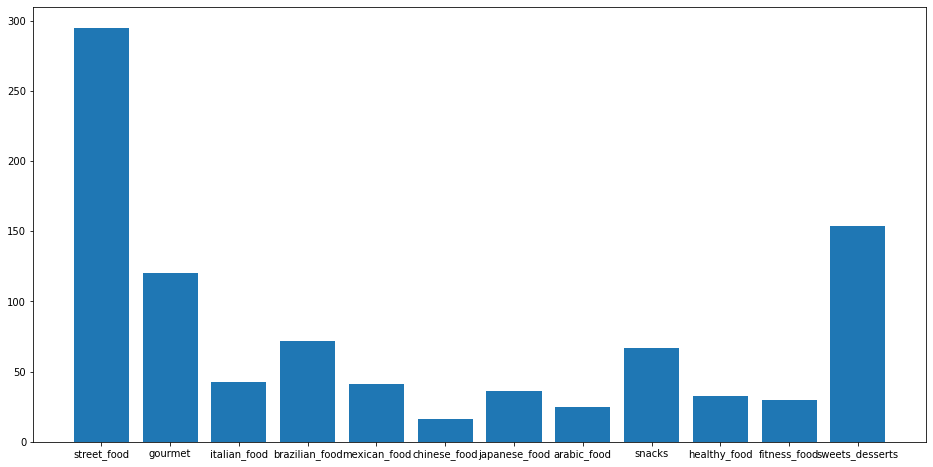

In [85]:
#Calculando as instâncias para cada classe
label_d = {'street_food' : 0, 'gourmet': 0, 'italian_food' : 0, 'brazilian_food' : 0, 'mexican_food': 0, 'chinese_food' : 0, 'japanese_food': 0, 'arabic_food':0, 'snacks': 0, 'healthy_food':0, 'fitness_food':0, 'sweets_desserts':0}
for col in labels_df.columns:
    label_d[col] += len(labels_df[labels_df[col] == 1])
    
#visualizando o (des)balanceamento do dataset
plt.figure(figsize = (16,8))
plt.bar(range(len(label_d)), list(label_d.values()), align='center')
plt.xticks(range(len(label_d)), list(label_d.keys()))
plt.show()

In [86]:
label_d

{'arabic_food': 25,
 'brazilian_food': 72,
 'chinese_food': 16,
 'fitness_food': 30,
 'gourmet': 120,
 'healthy_food': 33,
 'italian_food': 43,
 'japanese_food': 36,
 'mexican_food': 41,
 'snacks': 67,
 'street_food': 295,
 'sweets_desserts': 154}

##Encoding nos atributos não-numéricos

In [87]:
from sklearn.preprocessing import LabelEncoder
leTime = LabelEncoder()
leMotivation = LabelEncoder()
leGender = LabelEncoder()
leMaritalstatus = LabelEncoder()

df["time"]= leTime.fit_transform(df["time"].values)
df["motivation"]= leMotivation.fit_transform(df["motivation"].values)
df["gender"]= leGender.fit_transform(df["gender"].values)
df["marital.status"]= leMaritalstatus.fit_transform(df["marital.status"].values)
df

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,2,30.0,2,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,1,2.0,1.5,4.0,0.0,2,1,0,0,0,0,0,0,0,0,0,0,1
1,0.0,2,20.0,1,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,0,3.0,2.0,5.0,1.0,1,1,0,1,0,1,0,0,0,0,0,0,1
2,1.0,0,15.0,1,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,1,2.0,1.5,4.0,1.0,2,1,0,0,1,0,0,0,0,0,0,0,0
3,0.0,4,40.0,2,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,1,3.0,2.0,6.0,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,2,15.0,3,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1,2.0,1.5,4.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,2,30.0,2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,0,3.0,2.0,3.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0
403,0.0,2,30.0,3,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,0,1.0,1.0,4.0,0.0,2,1,1,0,0,0,0,0,0,0,0,0,1
404,0.0,2,30.0,3,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,1,2.0,2.0,1.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,1
405,1.0,2,30.0,3,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,1,3.0,1.5,2.0,1.0,1,1,1,1,1,1,1,1,1,1,0,0,1


In [88]:
df.dtypes

frequency          float64
time                 int64
expenses           float64
motivation           int64
taste              float64
hygiene            float64
menu               float64
presentation       float64
attendance         float64
ingredients        float64
place.to.sit       float64
takeaway           float64
variation          float64
stop.strucks       float64
schedule           float64
gender               int64
age.group          float64
scholarity         float64
average.income     float64
has.work           float64
marital.status       int64
street_food          int64
gourmet              int64
italian_food         int64
brazilian_food       int64
mexican_food         int64
chinese_food         int64
japanese_food        int64
arabic_food          int64
snacks               int64
healthy_food         int64
fitness_food         int64
sweets_desserts      int64
dtype: object

In [89]:
df.shape

(407, 33)

## Split dataset

In [90]:
dataset = pd.DataFrame(df)
X  = dataset.iloc[:,0:-12].values
y = dataset.iloc[:,21:].values
X
df_X = dataset.iloc[:,0:-12]
df_y = dataset.iloc[:,21:]

In [91]:
df_X

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status
0,2.0,2,30.0,2,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,1,2.0,1.5,4.0,0.0,2
1,0.0,2,20.0,1,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,0,3.0,2.0,5.0,1.0,1
2,1.0,0,15.0,1,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,1,2.0,1.5,4.0,1.0,2
3,0.0,4,40.0,2,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,1,3.0,2.0,6.0,1.0,2
4,0.0,2,15.0,3,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1,2.0,1.5,4.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,2,30.0,2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,0,3.0,2.0,3.0,1.0,2
403,0.0,2,30.0,3,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,0,1.0,1.0,4.0,0.0,2
404,0.0,2,30.0,3,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,1,2.0,2.0,1.0,1.0,2
405,1.0,2,30.0,3,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,1,3.0,1.5,2.0,1.0,1


In [92]:
X.shape, y.shape

((407, 21), (407, 12))

## Trabalhando no balanceamento do dataset - Oversampling

In [93]:
#feats_df
#labels_df
#labels_df.columns

In [221]:
#buscando as classes minoritárias
def get_classes_minoritarias(df):
    columns = labels_df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    list_label = []
    for i in range(n):
        if irpl[i] > mir:
            list_label.append(columns[i])
    return list_label 

In [222]:
a = get_classes_minoritarias(df_y)
a

['mexican_food',
 'chinese_food',
 'japanese_food',
 'arabic_food',
 'healthy_food',
 'fitness_food']

In [225]:
#retornando indices das classes minoritárias
def get_index(df):
  tail_labels = get_classes_minoritarias(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

In [226]:
b = get_index(df_y)
print(len(b))
print(b)

112
[1, 5, 6, 261, 8, 9, 266, 11, 268, 269, 272, 16, 20, 277, 25, 27, 284, 285, 31, 38, 40, 297, 41, 44, 302, 303, 48, 50, 51, 53, 312, 57, 316, 320, 65, 69, 325, 71, 326, 76, 77, 82, 83, 86, 87, 347, 93, 94, 351, 352, 97, 98, 100, 102, 104, 107, 108, 110, 367, 112, 116, 117, 373, 121, 122, 377, 124, 125, 127, 128, 129, 130, 384, 131, 135, 136, 394, 395, 140, 143, 144, 148, 405, 155, 160, 163, 174, 179, 180, 184, 188, 189, 190, 198, 199, 200, 201, 203, 207, 209, 210, 211, 213, 214, 215, 221, 222, 224, 233, 242, 243, 251]


In [227]:
#criando um dataframe com instancias das classes minoritárias
def get_minority_instance(X, y):
    index = get_instancias(y) #y
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub 

In [228]:
xsub, ysub = get_minority_instance(df_X,df_y)
xsub


,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status
0,0.0,2,20.0,1,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,0,3.0,2.0,5.0,1.0,1
1,1.0,2,20.0,2,5.0,4.0,3.0,3.0,4.0,5.0,4.0,2.0,3.0,3.0,3.0,1,2.0,1.5,1.0,0.0,2
2,1.0,2,20.0,2,4.0,5.0,5.0,4.0,4.0,4.0,5.0,3.0,3.0,2.0,1.0,1,3.0,2.0,1.0,1.0,2
3,1.0,2,20.0,3,5.0,5.0,3.0,5.0,4.0,3.0,5.0,3.0,2.0,3.0,3.0,0,2.0,1.5,6.0,0.0,2
4,0.0,2,40.0,2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,1.0,1,2.0,1.5,3.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0,15.0,2,5.0,5.0,5.0,5.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,1,1.0,0.0,1.0,1.0,2
108,1.0,2,40.0,3,4.0,4.0,4.0,4.0,5.0,5.0,3.0,3.0,5.0,5.0,4.0,0,3.0,3.0,4.0,0.0,2
109,2.0,2,20.0,1,5.0,5.0,4.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,0,3.0,2.0,1.0,1.0,1
110,1.0,2,30.0,3,5.0,5.0,5.0,5.0,4.0,4.0,2.0,1.0,4.0,4.0,5.0,0,2.0,1.5,5.0,0.0,2


In [100]:
ysub

,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,1,0,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,0,0,0,0,0,0,0,0,0,1,0
108,1,0,0,0,0,0,0,1,0,0,0,1
109,1,1,1,1,0,0,0,1,1,0,0,1
110,1,1,0,0,0,0,1,0,0,0,0,1


In [229]:
xsub.shape

(112, 21)

In [233]:
#5-nearest neighbor para as instancias
from sklearn.neighbors import NearestNeighbors
def nearest_neighbour(X):
  nbs= NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
  euclidean, indices= nbs.kneighbors(X)
  return indices

In [234]:
#Give the augmented data using MLSMOTE algorithm
def MLSMOTE(X,y, n_sample):
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target #augmented feature vector data and augmented target vector data

In [235]:
#from sklearn.neighbors import NearestNeighbors
import random
X_res,y_res = MLSMOTE(xsub, ysub, 500)     #Applying MLSMOTE to augment the dataframe

In [236]:
y_res.dtypes

street_food        float64
gourmet            float64
italian_food       float64
brazilian_food     float64
mexican_food       float64
chinese_food       float64
japanese_food      float64
arabic_food        float64
snacks             float64
healthy_food       float64
fitness_food       float64
sweets_desserts    float64
dtype: object

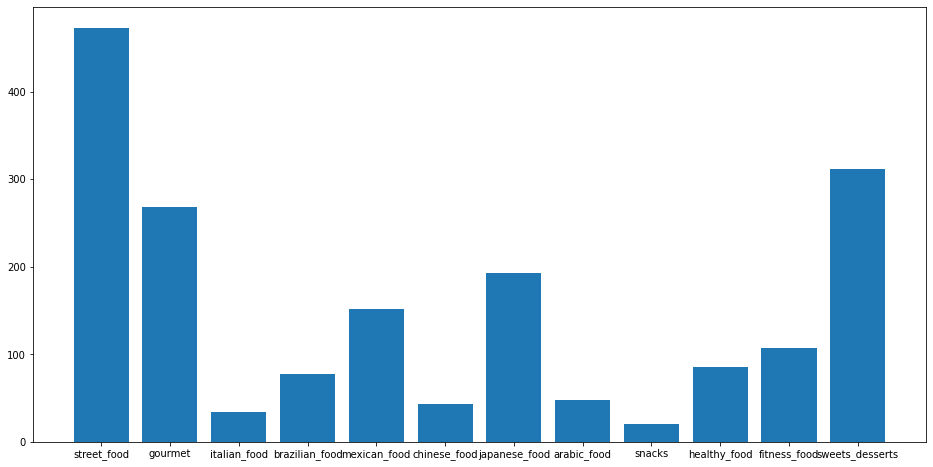

In [237]:
label_dsub = {'street_food' : 0, 'gourmet': 0, 'italian_food' : 0, 'brazilian_food' : 0, 'mexican_food': 0, 'chinese_food' : 0, 'japanese_food': 0, 'arabic_food':0, 'snacks': 0, 'healthy_food':0, 'fitness_food':0, 'sweets_desserts':0}
for col in y_res.columns:
    label_dsub[col] += len(y_res[y_res[col] == 1])
    
plt.figure(figsize = (16,8))
plt.bar(range(len(label_dsub)), list(label_dsub.values()), align='center')
plt.xticks(range(len(label_dsub)), list(label_dsub.keys()))
plt.show()

In [238]:
label_dsub

{'arabic_food': 48,
 'brazilian_food': 78,
 'chinese_food': 43,
 'fitness_food': 107,
 'gourmet': 268,
 'healthy_food': 86,
 'italian_food': 34,
 'japanese_food': 193,
 'mexican_food': 152,
 'snacks': 20,
 'street_food': 473,
 'sweets_desserts': 312}

In [239]:
X_res.shape

(612, 21)

## Padronizando dados 

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_res) 

In [241]:
y = y_res
y= y.values
y

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [242]:
X

array([[-0.59789518,  0.11907208, -0.21708042, ...,  1.05446063,
         0.70804492, -1.34468429],
       [ 0.12262429,  0.11907208, -0.21708042, ..., -1.16353053,
        -0.66449581,  0.39872121],
       [ 0.12262429,  0.11907208, -0.21708042, ..., -1.16353053,
         0.70804492,  0.39872121],
       ...,
       [-1.28906415,  1.77354867, -0.21708042, ..., -0.05453495,
        -1.98112582,  0.39872121],
       [-1.21014886, -1.44291704, -0.21708042, ...,  0.49996284,
        -0.66449581,  0.39872121],
       [ 0.62381491,  0.11907208, -1.00319413, ...,  1.82587376,
         0.70804492, -2.55739056]])

## Estratificação iterativa



In [243]:
#
#X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.40)

In [244]:
from skmultilearn.model_selection import iterative_train_test_split

In [245]:
!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [246]:
mskf = MultilabelStratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for train_index, test_index in mskf.split(X, y):
   print("\nInstâncias de treino:\n", train_index, "\nInstâncias de teste:", test_index)
   print('==================================================================================')
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]


Instâncias de treino:
 [  0   1   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  50  51  52  53  54  55  57  58
  59  60  61  63  64  65  66  67  68  69  71  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  99
 100 101 102 104 105 108 109 110 111 113 114 115 116 117 118 119 120 121
 123 124 125 126 127 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 149 151 152 153 154 155 156 158 160 161 162 163
 164 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 186 187 188 189 190 191 192 193 194 195 197 198 199 200 202 203
 204 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 26

In [247]:
X_train.shape, y_train.shape

((550, 21), (550, 12))

In [248]:
X_test.shape, y_test.shape

((62, 21), (62, 12))

In [249]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

,"(2,)","(0,)","(11,)","(4,)","(7,)","(1,)","(9,)","(6,)","(3,)","(10,)","(5,)","(8,)"
train,31,425,281,137,43,241,78,174,71,97,39,18
test,3,48,31,15,5,27,8,19,7,10,4,2


# Aprendizado Multilabel



In [250]:
avaliacoes = {}

## Binary Relevance/SVM 

In [251]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
br_classifier = BinaryRelevance(classifier=SVC(),require_dense=[False, True])
br_classifier.fit(X_train, y_train)
prediction = br_classifier.predict(X_test)
predicoes_br = pd.DataFrame(prediction.toarray())
predicoes_br

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
58,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [252]:
y_test

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.,

In [253]:
import sklearn.metrics as metrics
hl = metrics.hamming_loss(y_test, predicoes_br)
acc = metrics.accuracy_score(y_test, predicoes_br)
F1 = metrics.f1_score(y_test, predicoes_br, average='micro')
print(acc, hl, F1)
avaliacoes["ACC_BR_SVM"] = acc
avaliacoes["HL_BR_SVM"] = hl
avaliacoes["FS_BR_SVM"] = F1

0.6935483870967742 0.05510752688172043 0.8825214899713467


In [254]:
print(metrics.classification_report(y_test,predicoes_br))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        48
           1       0.96      0.89      0.92        27
           2       0.00      0.00      0.00         3
           3       1.00      0.43      0.60         7
           4       0.93      0.93      0.93        15
           5       1.00      0.75      0.86         4
           6       0.79      0.79      0.79        19
           7       1.00      0.60      0.75         5
           8       1.00      0.50      0.67         2
           9       0.86      0.75      0.80         8
          10       0.90      0.90      0.90        10
          11       0.91      0.94      0.92        31

   micro avg       0.91      0.86      0.88       179
   macro avg       0.85      0.70      0.76       179
weighted avg       0.90      0.86      0.87       179
 samples avg       0.83      0.79      0.80       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
#MLP -teste
#from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(random_state=1, max_iter=1000, verbose=True, tol=0.000001).fit(X_train, y_train)
#mlp_pred = mlp.predict_proba(X_test)

### Matriz de confusão

multilabel_confusion_matrix
* (0,0)verdadeiro negativo - (0,1)falsos positivos
* (1,0)falsos negativos - (1,1)verdadeiros positivos

In [256]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, prediction)
cm

array([[[ 9,  5],
        [ 1, 47]],

       [[34,  1],
        [ 3, 24]],

       [[59,  0],
        [ 3,  0]],

       [[55,  0],
        [ 4,  3]],

       [[46,  1],
        [ 1, 14]],

       [[58,  0],
        [ 1,  3]],

       [[39,  4],
        [ 4, 15]],

       [[57,  0],
        [ 2,  3]],

       [[60,  0],
        [ 1,  1]],

       [[53,  1],
        [ 2,  6]],

       [[51,  1],
        [ 1,  9]],

       [[28,  3],
        [ 2, 29]]])

## Bunary Relevance/Random Forest

In [257]:
#from sklearn.ensemble import RandomForestClassifier

In [258]:
classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
classifier.fit(X_train, y_train)
prediction_br_RFC=classifier.predict(X_test)

ACC_BR_RFC = metrics.accuracy_score(y_test, prediction_br_RFC)
HL_BR_RFC = metrics.hamming_loss(y_test, prediction_br_RFC)
FS_BR_RFC = metrics.f1_score(y_test, prediction_br_RFC, average='micro')
print(ACC_BR_RFC, HL_BR_RFC, FS_BR_RFC)
avaliacoes["ACC_BR_RFC"] = ACC_BR_RFC
avaliacoes["HL_BR_RFC"] = HL_BR_RFC
avaliacoes["FS_BR_RFC"] = FS_BR_RFC


0.6612903225806451 0.05779569892473118 0.8760806916426513


In [259]:
print(metrics.classification_report(y_test,prediction_br_RFC))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.92      0.81      0.86        27
           2       0.00      0.00      0.00         3
           3       1.00      0.43      0.60         7
           4       0.83      1.00      0.91        15
           5       1.00      0.75      0.86         4
           6       0.89      0.89      0.89        19
           7       1.00      0.60      0.75         5
           8       1.00      0.50      0.67         2
           9       0.83      0.62      0.71         8
          10       0.90      0.90      0.90        10
          11       0.90      0.87      0.89        31

   micro avg       0.90      0.85      0.88       179
   macro avg       0.85      0.70      0.75       179
weighted avg       0.89      0.85      0.86       179
 samples avg       0.83      0.78      0.79       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de confusão

In [260]:
cmm = multilabel_confusion_matrix(y_test, prediction_br_RFC)
cmm

array([[[10,  4],
        [ 1, 47]],

       [[33,  2],
        [ 5, 22]],

       [[59,  0],
        [ 3,  0]],

       [[55,  0],
        [ 4,  3]],

       [[44,  3],
        [ 0, 15]],

       [[58,  0],
        [ 1,  3]],

       [[41,  2],
        [ 2, 17]],

       [[57,  0],
        [ 2,  3]],

       [[60,  0],
        [ 1,  1]],

       [[53,  1],
        [ 3,  5]],

       [[51,  1],
        [ 1,  9]],

       [[28,  3],
        [ 4, 27]]])

## Label Power Set/RandomForest

In [261]:
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(classifier = RandomForestClassifier(), require_dense = [False, True])
classifier.fit(X_train, y_train)
prediction_LP_RFC=classifier.predict(X_test)

ACC_LP_RFC = metrics.accuracy_score(y_test, prediction_LP_RFC)
HL_LP_RFC = metrics.hamming_loss(y_test, prediction_LP_RFC)
FS_LP_RFC = metrics.f1_score(y_test, prediction_LP_RFC, average='micro')
print(ACC_LP_RFC, HL_LP_RFC, FS_LP_RFC)
avaliacoes["ACC_LP_RFC"] = ACC_LP_RFC
avaliacoes["HL_LP_RFC"] = HL_LP_RFC
avaliacoes["FS_LP_RFC"] = FS_LP_RFC

0.7258064516129032 0.05510752688172043 0.8851540616246498


In [262]:
print(metrics.classification_report(y_test,prediction_LP_RFC))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.92      0.85      0.88        27
           2       1.00      0.33      0.50         3
           3       0.80      0.57      0.67         7
           4       0.79      1.00      0.88        15
           5       1.00      0.75      0.86         4
           6       0.90      0.95      0.92        19
           7       1.00      0.60      0.75         5
           8       1.00      0.50      0.67         2
           9       0.67      0.75      0.71         8
          10       0.82      0.90      0.86        10
          11       0.93      0.90      0.92        31

   micro avg       0.89      0.88      0.89       179
   macro avg       0.90      0.76      0.80       179
weighted avg       0.89      0.88      0.88       179
 samples avg       0.82      0.81      0.81       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de confusão

In [263]:
cmlp = multilabel_confusion_matrix(y_test, prediction_LP_RFC)
cmlp

array([[[10,  4],
        [ 1, 47]],

       [[33,  2],
        [ 4, 23]],

       [[59,  0],
        [ 2,  1]],

       [[54,  1],
        [ 3,  4]],

       [[43,  4],
        [ 0, 15]],

       [[58,  0],
        [ 1,  3]],

       [[41,  2],
        [ 1, 18]],

       [[57,  0],
        [ 2,  3]],

       [[60,  0],
        [ 1,  1]],

       [[51,  3],
        [ 2,  6]],

       [[50,  2],
        [ 1,  9]],

       [[29,  2],
        [ 3, 28]]])


## Label Power Set/SVM




In [264]:
classifier = LabelPowerset(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, y_train)
prediction_LP_SVM=classifier.predict(X_test)

ACC_LP_SVM = metrics.accuracy_score(y_test, prediction_LP_SVM)
HL_LP_SVM = metrics.hamming_loss(y_test, prediction_LP_SVM)
FS_LP_SVM = metrics.f1_score(y_test, prediction_LP_SVM, average='micro')
print(ACC_LP_SVM, HL_LP_SVM, FS_LP_SVM)
avaliacoes["ACC_LP_SVM"] = ACC_LP_SVM
avaliacoes["HL_LP_SVM"] = HL_LP_SVM
avaliacoes["FS_LP_SVM"] = FS_LP_SVM

0.7580645161290323 0.053763440860215055 0.8876404494382022


In [265]:
print(metrics.classification_report(y_test,prediction_LP_SVM))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        48
           1       0.89      0.89      0.89        27
           2       1.00      0.67      0.80         3
           3       1.00      0.57      0.73         7
           4       0.79      1.00      0.88        15
           5       1.00      0.75      0.86         4
           6       0.89      0.89      0.89        19
           7       0.75      0.60      0.67         5
           8       1.00      0.50      0.67         2
           9       0.86      0.75      0.80         8
          10       0.90      0.90      0.90        10
          11       0.93      0.87      0.90        31

   micro avg       0.89      0.88      0.89       179
   macro avg       0.91      0.78      0.83       179
weighted avg       0.90      0.88      0.88       179
 samples avg       0.81      0.80      0.80       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

In [266]:
cmlpsvm = multilabel_confusion_matrix(y_test, prediction_LP_SVM)
cmlpsvm

array([[[ 9,  5],
        [ 1, 47]],

       [[32,  3],
        [ 3, 24]],

       [[59,  0],
        [ 1,  2]],

       [[55,  0],
        [ 3,  4]],

       [[43,  4],
        [ 0, 15]],

       [[58,  0],
        [ 1,  3]],

       [[41,  2],
        [ 2, 17]],

       [[56,  1],
        [ 2,  3]],

       [[60,  0],
        [ 1,  1]],

       [[53,  1],
        [ 2,  6]],

       [[51,  1],
        [ 1,  9]],

       [[29,  2],
        [ 4, 27]]])

## Classifier Chain/RandonForest

In [267]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(classifier = RandomForestClassifier(),require_dense = [False, True])
classifier.fit(X_train,y_train)
predict_CC_RFC = classifier.predict(X_test)

ACC_CC_RFC = metrics.accuracy_score(y_test, predict_CC_RFC)
HL_CC_RFC = metrics.hamming_loss(y_test, predict_CC_RFC) 
FS_CC_RFC = metrics.f1_score(y_test, predict_CC_RFC, average='micro')
print(ACC_CC_RFC, HL_CC_RFC, FS_CC_RFC)
avaliacoes["ACC_CC_RFC"] = ACC_CC_RFC
avaliacoes["HL_CC_RFC"] = HL_CC_RFC
avaliacoes["FS_CC_RFC"] = FS_CC_RFC

0.6935483870967742 0.05913978494623656 0.8735632183908046


In [268]:
print(metrics.classification_report(y_test,predict_CC_RFC))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.92      0.85      0.88        27
           2       0.00      0.00      0.00         3
           3       1.00      0.43      0.60         7
           4       0.83      1.00      0.91        15
           5       1.00      0.50      0.67         4
           6       0.86      0.95      0.90        19
           7       1.00      0.60      0.75         5
           8       1.00      0.50      0.67         2
           9       0.83      0.62      0.71         8
          10       0.89      0.80      0.84        10
          11       0.90      0.87      0.89        31

   micro avg       0.90      0.85      0.87       179
   macro avg       0.85      0.68      0.73       179
weighted avg       0.89      0.85      0.86       179
 samples avg       0.83      0.79      0.79       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de confusão

In [269]:
cmccrf = multilabel_confusion_matrix(y_test, predict_CC_RFC)
cmccrf

array([[[10,  4],
        [ 1, 47]],

       [[33,  2],
        [ 4, 23]],

       [[59,  0],
        [ 3,  0]],

       [[55,  0],
        [ 4,  3]],

       [[44,  3],
        [ 0, 15]],

       [[58,  0],
        [ 2,  2]],

       [[40,  3],
        [ 1, 18]],

       [[57,  0],
        [ 2,  3]],

       [[60,  0],
        [ 1,  1]],

       [[53,  1],
        [ 3,  5]],

       [[51,  1],
        [ 2,  8]],

       [[28,  3],
        [ 4, 27]]])

In [270]:
#classifierChain =>SVM

## Classifier Chain/SVM

In [271]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(classifier = SVC(),require_dense = [False, True])
classifier.fit(X_train,y_train)
predict_CC_SVM = classifier.predict(X_test)

ACC_CC_SVM = metrics.accuracy_score(y_test, predict_CC_SVM)
HL_CC_SVM = metrics.hamming_loss(y_test, predict_CC_SVM) 
FS_CC_SVM = metrics.f1_score(y_test, predict_CC_SVM, average='micro')
print(ACC_CC_SVM, HL_CC_SVM, FS_CC_SVM)
avaliacoes["ACC_CC_SVM"] = ACC_CC_SVM
avaliacoes["HL_CC_SVM"] = HL_CC_SVM
avaliacoes["FS_CC_SVM"] = FS_CC_SVM

0.6935483870967742 0.05510752688172043 0.8831908831908832


In [272]:
print(metrics.classification_report(y_test,predict_CC_SVM))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        48
           1       0.92      0.89      0.91        27
           2       0.00      0.00      0.00         3
           3       1.00      0.43      0.60         7
           4       0.88      0.93      0.90        15
           5       1.00      0.75      0.86         4
           6       0.80      0.84      0.82        19
           7       1.00      0.60      0.75         5
           8       1.00      0.50      0.67         2
           9       0.86      0.75      0.80         8
          10       0.90      0.90      0.90        10
          11       0.94      0.94      0.94        31

   micro avg       0.90      0.87      0.88       179
   macro avg       0.85      0.71      0.76       179
weighted avg       0.89      0.87      0.87       179
 samples avg       0.83      0.80      0.80       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

In [273]:
cmccsvm = multilabel_confusion_matrix(y_test, predict_CC_SVM)
cmccsvm

array([[[ 9,  5],
        [ 1, 47]],

       [[33,  2],
        [ 3, 24]],

       [[59,  0],
        [ 3,  0]],

       [[55,  0],
        [ 4,  3]],

       [[45,  2],
        [ 1, 14]],

       [[58,  0],
        [ 1,  3]],

       [[39,  4],
        [ 3, 16]],

       [[57,  0],
        [ 2,  3]],

       [[60,  0],
        [ 1,  1]],

       [[53,  1],
        [ 2,  6]],

       [[51,  1],
        [ 1,  9]],

       [[29,  2],
        [ 2, 29]]])

#Comparando dos Resultados

In [274]:
avaliacoes

{'ACC_BR_RFC': 0.6612903225806451,
 'ACC_BR_SVM': 0.6935483870967742,
 'ACC_CC_RFC': 0.6935483870967742,
 'ACC_CC_SVM': 0.6935483870967742,
 'ACC_LP_RFC': 0.7258064516129032,
 'ACC_LP_SVM': 0.7580645161290323,
 'FS_BR_RFC': 0.8760806916426513,
 'FS_BR_SVM': 0.8825214899713467,
 'FS_CC_RFC': 0.8735632183908046,
 'FS_CC_SVM': 0.8831908831908832,
 'FS_LP_RFC': 0.8851540616246498,
 'FS_LP_SVM': 0.8876404494382022,
 'HL_BR_RFC': 0.05779569892473118,
 'HL_BR_SVM': 0.05510752688172043,
 'HL_CC_RFC': 0.05913978494623656,
 'HL_CC_SVM': 0.05510752688172043,
 'HL_LP_RFC': 0.05510752688172043,
 'HL_LP_SVM': 0.053763440860215055}

In [275]:
avaliacoes["ACC_BR_SVM"]

0.6935483870967742

In [276]:
resultados_df = pd.DataFrame()

In [277]:
resultados_df['Classificação'] = ['BR(rf)', 'BR(svm)','LP(rf)', 'LP(svm)','CC(rf)', 'CC(svm)',]
resultados_df['Acurácias'] = [avaliacoes["ACC_BR_RFC"], avaliacoes["ACC_BR_SVM"],avaliacoes["ACC_CC_RFC"],avaliacoes["ACC_CC_SVM"],avaliacoes["ACC_LP_RFC"],avaliacoes["ACC_LP_SVM"],]
resultados_df['Erros'] = [avaliacoes["HL_BR_RFC"], avaliacoes["HL_BR_SVM"],avaliacoes["HL_CC_RFC"],avaliacoes["HL_CC_SVM"],avaliacoes["HL_LP_RFC"],avaliacoes["HL_LP_SVM"],]
resultados_df['F1-score'] = [avaliacoes["FS_BR_RFC"], avaliacoes["FS_BR_SVM"],avaliacoes["FS_CC_RFC"],avaliacoes["FS_CC_SVM"],avaliacoes["FS_LP_RFC"],avaliacoes["FS_LP_SVM"],]

In [278]:
resultados_df.head(6)

,Classificação,Acurácias,Erros,F1-score
0,BR(rf),0.661290,0.057796,0.876081
1,BR(svm),0.693548,0.055108,0.882521
2,LP(rf),0.693548,0.059140,0.873563
3,LP(svm),0.693548,0.055108,0.883191
4,CC(rf),0.725806,0.055108,0.885154
5,CC(svm),0.758065,0.053763,0.887640


In [279]:
grafico = resultados_df.iloc[:,1:]
grafico

,Acurácias,Erros,F1-score
0,0.661290,0.057796,0.876081
1,0.693548,0.055108,0.882521
2,0.693548,0.059140,0.873563
3,0.693548,0.055108,0.883191
4,0.725806,0.055108,0.885154
5,0.758065,0.053763,0.887640


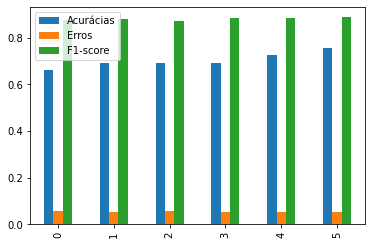

In [280]:
grafico.plot(kind='bar')